In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load CIFAR-10 dataset
(train_X, train_Y), (test_X, test_Y) = keras.datasets.cifar10.load_data()

# Normalize the dataset
train_X, test_X = train_X / 255.0, test_X / 255.0

# One-hot encode the labels
train_Y_one_hot = keras.utils.to_categorical(train_Y, 10)
test_Y_one_hot = keras.utils.to_categorical(test_Y, 10)

# Split validation set from training data
val_X, val_Y = train_X[45000:], train_Y_one_hot[45000:]
train_X, train_Y = train_X[:45000], train_Y_one_hot[:45000]


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Define CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,890 (730.04 KB)

 Trainable params: 186,890 (730.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 87s 120ms/step - accuracy: 0.3346 - loss: 1.8143 - val_accuracy: 0.5314 - val_loss: 1.3117
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 142s 121ms/step - accuracy: 0.5581 - loss: 1.2531 - val_accuracy: 0.6100 - val_loss: 1.1105
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 141s 119ms/step - accuracy: 0.6274 - loss: 1.0707 - val_accuracy: 0.6448 - val_loss: 1.0396
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 142s 120ms/step - accuracy: 0.6579 - loss: 0.9797 - val_accuracy: 0.6450 - val_loss: 1.0159
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.6862 - loss: 0.9039 - val_accuracy: 0.6530 - val_loss: 0.9944
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 142s 117ms/step - accuracy: 0.7076 - loss: 0.8466 - val_accuracy: 0.7000 - val_loss: 0.8902
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.7195 - loss: 0.8060 - val_accuracy: 0.6920 - val_loss: 0.9024
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 140s 117ms/step - accuracy: 0.7361 - l

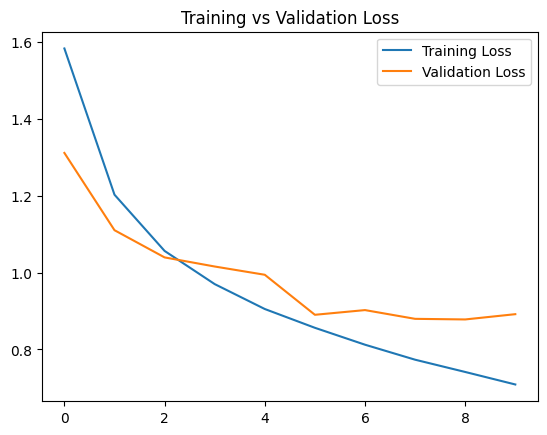

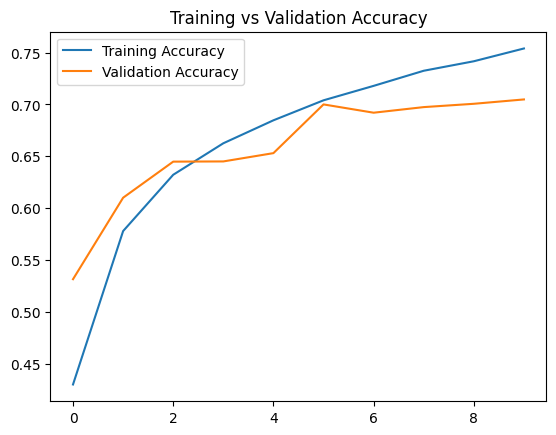

In [4]:
# Train the model
history = model.fit(train_X, train_Y, epochs=10, batch_size=64, validation_data=(val_X, val_Y))

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [5]:
# Evaluate model on test data
score = model.evaluate(test_X, test_Y_one_hot, verbose=1)
print(f'\nTest Accuracy: {score[1]:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6891 - loss: 0.9274

Test Accuracy: 0.6868


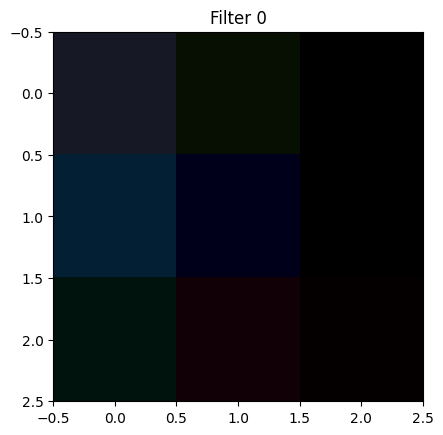

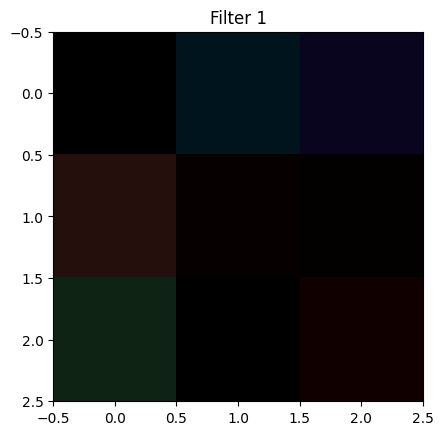

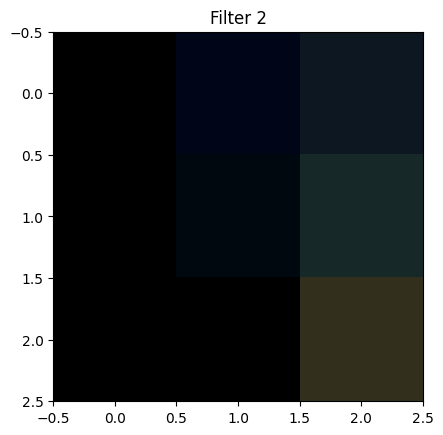

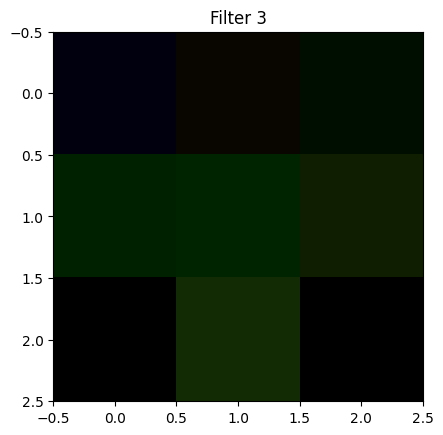

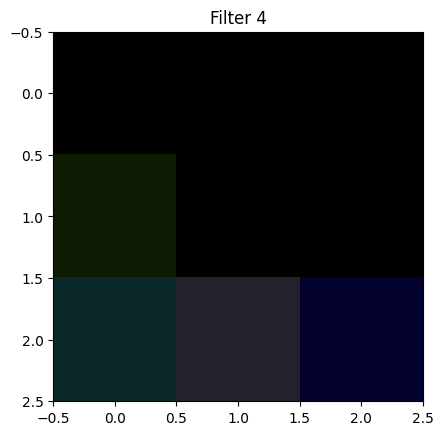

In [7]:
# Get filters from the first layer
filters, biases = model.layers[0].get_weights()

# Plot first 5 filters
for i in range(5):
    plt.imshow(filters[:, :, :, i], cmap='gray')
    plt.title(f'Filter {i}')
    plt.show()


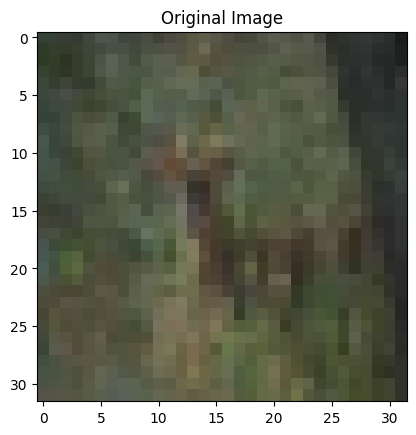

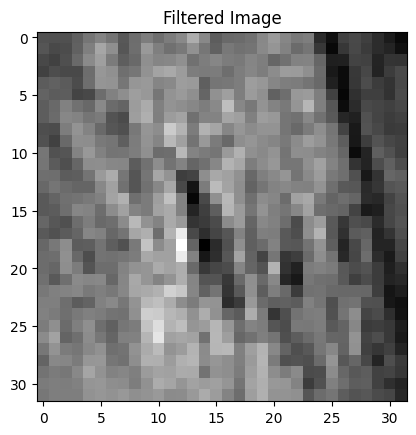

In [8]:
from scipy import signal

# Select an image
im = train_X[10]
plt.imshow(im)
plt.title("Original Image")
plt.show()

# Convert image to grayscale for filtering
im_gray = np.dot(im[..., :3], [0.2989, 0.5870, 0.1140])

# Apply the filter
filtered_image = signal.convolve2d(im_gray, filters[:, :, 0, 0], boundary='symm', mode='same')

# Show the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image")
plt.show()


In [9]:
# Define a fully connected dense model
fc_model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
fc_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the dense network
fc_history = fc_model.fit(train_X, train_Y, epochs=10, batch_size=64, validation_data=(val_X, val_Y))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.1919 - loss: 2.2345 - val_accuracy: 0.2868 - val_loss: 1.9783
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.2360 - loss: 2.0167 - val_accuracy: 0.3126 - val_loss: 1.9447
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.2541 - loss: 1.9739 - val_accuracy: 0.3172 - val_loss: 1.9342
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.2746 - loss: 1.9367 - val_accuracy: 0.3486 - val_loss: 1.9201
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.2765 - loss: 1.9302 - val_accuracy: 0.3122 - val_loss: 1.9283
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.2814 - loss: 1.9243 - val_accuracy: 0.3328 - val_loss: 1.9105
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.2907 - loss: 1.8923 - val_accuracy: 0.3284 - val_loss: 1.9130
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.2950 - loss: 1.8981 - 

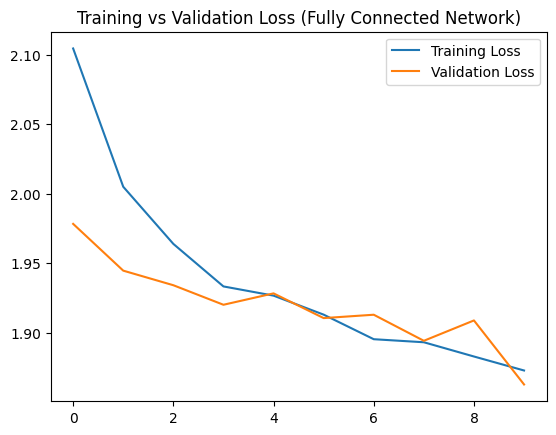

In [10]:
# Plot training & validation loss
plt.plot(fc_history.history['loss'], label='Training Loss')
plt.plot(fc_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss (Fully Connected Network)")
plt.show()


In [11]:
# Evaluate the fully connected model on test data
fc_score = fc_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print(f'\nTest Accuracy (Fully Connected Network): {fc_score[1]:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3664 - loss: 1.8450

Test Accuracy (Fully Connected Network): 0.3651
